<font size=5>

# OvR与OvO    
## 逻辑回归只能解决二分类问题

所以需要OvR或OvO来解决多分类问题

OvR：One vs Rest 或者说 OvA：One vs All

二、原理
　1）OvR
思想：n 种类型的样本进行分类时，分别取一种样本作为一类，将剩余的所有类型的样本看做另一类，这样就形成了 n 个二分类问题，使用逻辑回归算法对 n 个数据集训练出 n 个模型，将待预测的样本传入这 n 个模型中，所得概率最高的那个模型对应的样本类型即认为是该预测样本的类型；
![ovr](https://images2018.cnblogs.com/blog/1355387/201807/1355387-20180729220050227-2123786111.png)
    
时间复杂度：如果处理一个二分类问题用时 T，此方法需要用时 n.T；
 

　2）OvO
思想： n 类样本中，每次挑出 2 种类型，两两结合，一共有 Cn2 种二分类情况，使用 Cn2 种模型预测样本类型，有 Cn2 个预测结果，种类最多的那种样本类型，就认为是该样本最终的预测类型；
![ovo](https://images2018.cnblogs.com/blog/1355387/201807/1355387-20180730081828969-80068959.png)
    
时间复杂度：如果处理一个二分类问题用时 T，此方法需要用时 Cn2 .T = [n.(n - 1) / 2] . T；
 

　3）区别
OvO 用时较多，但其分类结果更准确，因为每一次二分类时都用真实的类型进行比较，没有混淆其它的类别；
 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
# [:, :2]：所有行，0、1 列，不包含 2 列；
X = iris.data[:,:2]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)
# 准确率：0.6578947368421053

/root/jupyter/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/jupyter/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6578947368421053

/root/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


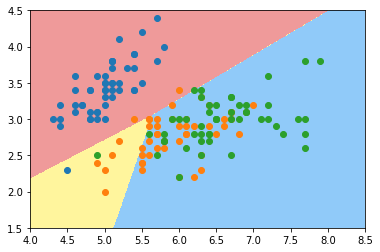

In [3]:

def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

plot_decision_boundary(log_reg, axis=[4, 8.5, 1.5, 4.5])
# 可视化时只能在同一个二维平面内体现两种特征；
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

/root/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


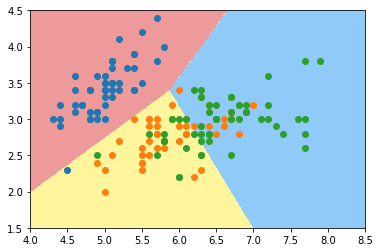

In [4]:
log_reg2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
# 'multinomial'：指 OvO 方法；

log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test)
# 准确率：0.7894736842105263


plot_decision_boundary(log_reg2, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

In [5]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

log_reg_ovr = LogisticRegression()
log_reg_ovr.fit(X_train, y_train)
log_reg_ovr.score(X_test, y_test)
# 准确率：0.9473684210526315

/root/jupyter/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/jupyter/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9473684210526315

In [6]:
log_reg_ovo = LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_reg_ovo.fit(X_train, y_train)
log_reg_ovo.score(X_test, y_test)
# 准确率：1.0

1.0